Встановлення необхідних бібліотек

In [2]:
! pip install PyOpenGL PyOpenGL_accelerate pygame pydicom matplotlib Pillow --quiet


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


Створення простої візуалізації куба за допомогою OpenGL

In [6]:
import pygame
from pygame.locals import *
from OpenGL.GL import *
from OpenGL.GLU import *

# Визначення вершин куба
vertices = (
    (1, -1, -1),
    (1, 1, -1),
    (-1, 1, -1),
    (-1, -1, -1),
    (1, -1, 1),
    (1, 1, 1),
    (-1, -1, 1),
    (-1, 1, 1)
)

# Визначення ребер куба
edges = (
    (0, 1),
    (0, 3),
    (0, 4),
    (2, 1),
    (2, 3),
    (2, 7),
    (6, 3),
    (6, 4),
    (6, 7),
    (5, 1),
    (5, 4),
    (5, 7)
)

def Cube():
    glBegin(GL_LINES)
    for edge in edges:
        for vertex in edge:
            glVertex3fv(vertices[vertex])
    glEnd()

def main():
    pygame.init()
    display = (800, 600)
    pygame.display.set_mode(display, DOUBLEBUF | OPENGL)
    gluPerspective(45, (display[0] / display[1]), 0.1, 50.0)
    glTranslatef(0.0, 0.0, -5)

    while True:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()

        glRotatef(1, 3, 1, 1)
        glClear(GL_COLOR_BUFFER_BIT | GL_DEPTH_BUFFER_BIT)
        Cube()
        pygame.display.flip()
        pygame.time.wait(5)

main()

pygame 2.6.0 (SDL 2.28.4, Python 3.9.20)
Hello from the pygame community. https://www.pygame.org/contribute.html


error: video system not initialized

: 

Завантаження зображення dicom

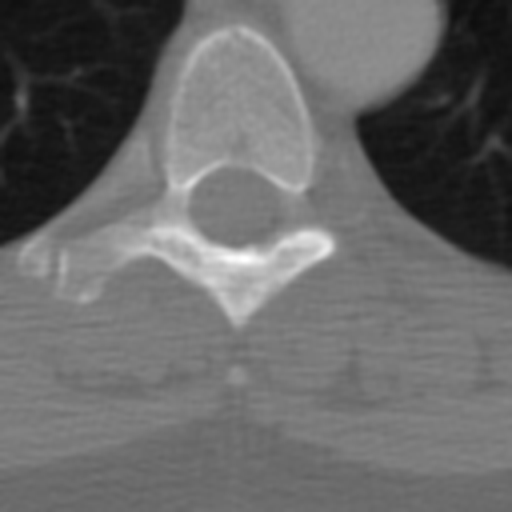

In [1]:
import pydicom
import numpy as np
from PIL import Image
from pydicom.data import get_testdata_files

dicom_file_path = get_testdata_files('CT_small.dcm')[0]
dicom_data = pydicom.dcmread(dicom_file_path)

pixel_array = dicom_data.pixel_array
pixel_array = pixel_array.astype(float)
pixel_array = (np.maximum(pixel_array, 0) / pixel_array.max()) * 255.0
pixel_array = np.uint8(pixel_array)

image = Image.fromarray(pixel_array)
new_size = (512, 512)
image = image.resize(new_size, Image.Resampling.LANCZOS)
image